In [90]:
%matplotlib inline
import glob
import FPUtils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.signal import find_peaks, peak_prominences, peak_widths
from sklearn.metrics import auc

In [110]:
hetTanks = r"C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\het/*"
wtTanks = r"C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\wt/*"
# testpath = r"c:\Users\aak283\Fiber_Photo\Tanks\RI30 Day 4 tanks\hets (D4)\EN183_RI30D4-240719-125435"

In [111]:
def create_dict_whole(tanks, tenminbefore):
    peak_dff = []
    peak_amps = []
    peak_prom = []
    peak_aucs = []
    lastn = []
    avglastaucs = []
    peak_freq = []
    for file in glob.glob(tanks):
        avg = []
        aucs = []
        lastaucs = []
        lastdff = []
        print(file)
        data,dFF,dsFactor,_ = FPUtils.readFile(file)
        dFF = dFF[:-int(5*1018)]
        peaks = find_peaks(dFF,prominence = 5)
        widths = peak_widths(dFF, peaks[0])
        for i in peaks[0]:
            avg.append(dFF[i])
            # if i > (tenminbefore*101.8):
            #     lastdff.append(dFF[i])
            peak_dff.append(len(avg))
        lastn.append(len(lastdff))
        for i in range(len(widths[2])):
            left = int(widths[2][i])
            right = int(widths[3][i])
            aucs.append(auc(range(right-left), dFF[left:right])/(right-left))
            # if widths[2][i]>(tenminbefore*101.8):
            #     left = int(widths[2][i])
            #     right = int(widths[3][i])
            #     lastaucs.append(auc(range(right-left), dFF[left:right])/(right-left))
        peak_aucs.append(np.nanmean(aucs))
        peak_amps.append(np.nanmean(avg))
        peak_prom.append(np.nanmean(peaks[1]['prominences']))
        peak_freq.append(len(peaks[0])/25)
        # avglastaucs.append(np.mean(lastaucs))

        dictionary ={"avg number peaks (normalized to n reward)": peak_dff,
                    "avg peak amplitude": peak_amps,
                    "avg peak auc": peak_aucs,
                    "avg peak prominence": peak_prom,
                    "peak frequency": peak_freq
                    }
    return dictionary


In [112]:
het_summary = create_dict_whole(hetTanks, 3000)

C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\het\EN173_OFH-240829-135107
read from t=0s to t=1798.94s
C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\het\EN181_OFH-240829-143030
read from t=0s to t=1799.06s
C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\het\EN182_OFH-240829-115021
read from t=0s to t=1799.1s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\het\EN183_OFH-240829-150948
read from t=0s to t=1799.1s
C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\het\EN189_OFH-240829-131105
read from t=0s to t=1799.09s


In [113]:
wt_summary  = create_dict_whole(wtTanks, 3000)

C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\wt\EN147_OFH-240829-115052
read from t=0s to t=1799.09s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\wt\EN172_OFH-240829-111321
read from t=0s to t=1798.95s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\wt\EN186_OFH-240829-135020
read from t=0s to t=1799.0s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\wt\EN187_OFH-240829-123029
read from t=0s to t=1799.1s
C:\Users\User\Tischfield_Lab\Fiber_Photo\Sample_Tank\Open Field tanks\Haloperidol tanks\wt\EN188_OFH-240829-131028
read from t=0s to t=1799.1s


In [114]:
hdf = pd.DataFrame()
for i in range(len(het_summary['avg peak auc'])):
    # hdf.loc[i, 'last 10 minutes: peak mean'] = het_summary['last 10 minutes: avg number peaks'][i]
    # hdf.loc[i, 'last 10 minutes: auc mean'] = het_summary['last 10 minutes: avg peak auc '][i]
    hdf.loc[i, 'peaks mean'] = het_summary['avg number peaks (normalized to n reward)'][i]
    hdf.loc[i, 'prom mean'] = het_summary['avg peak prominence'][i]
    hdf.loc[i, 'amp mean'] = het_summary['avg peak amplitude'][i]
    hdf.loc[i, 'auc mean'] = het_summary['avg peak auc'][i]
    hdf.loc[i, 'genotype'] = 'het'
    hdf.loc[i, 'peak frequency'] = het_summary['peak frequency'][i]
    
wdf = pd.DataFrame()
for i in range(len(wt_summary['avg peak auc'])):
    wdf.loc[i, 'peaks mean'] = wt_summary['avg number peaks (normalized to n reward)'][i]
    wdf.loc[i, 'prom mean'] = wt_summary['avg peak prominence'][i]
    wdf.loc[i, 'amp mean'] = wt_summary['avg peak amplitude'][i]
    wdf.loc[i, 'auc mean'] = wt_summary['avg peak auc'][i]
    wdf.loc[i, 'genotype'] = 'wt'
    wdf.loc[i, 'peak frequency'] = wt_summary['peak frequency'][i]
    # wdf.loc[i, 'last 10 minutes: peak mean'] = wt_summary['last 10 minutes: avg number peaks'][i]
    # wdf.loc[i, 'last 10 minutes: auc mean'] = wt_summary['last 10 minutes: avg peak auc '][i]
df = pd.concat([hdf, wdf], ignore_index=True)

Text(-1, -1, 'mannwhitney, p = 0.095')

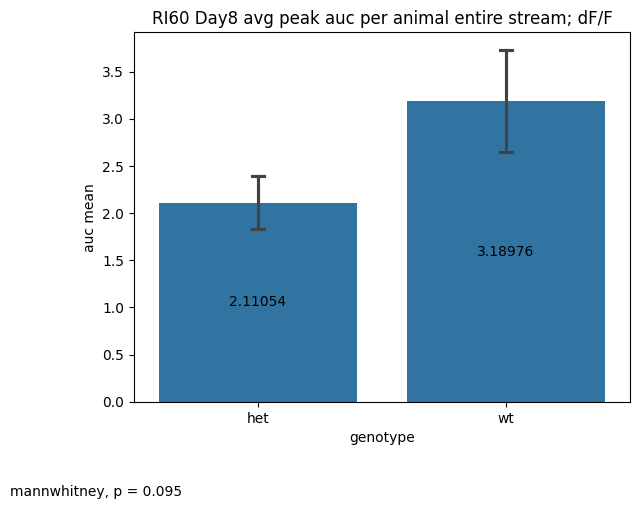

In [115]:
ax = sns.barplot(data = df, x = 'genotype', y = 'auc mean', errorbar='se', capsize=.05)
ax.bar_label(ax.containers[0], label_type='center')
ax.set_title('RI60 Day8 avg peak auc per animal entire stream; dF/F')
ax.text(-1, -1, 
         f"mannwhitney, p = {np.round(mannwhitneyu(het_summary['avg peak auc'], wt_summary['avg peak auc'])[1], decimals=3)}")

Text(-1, -3, 'mannwhitney, p = 0.834')

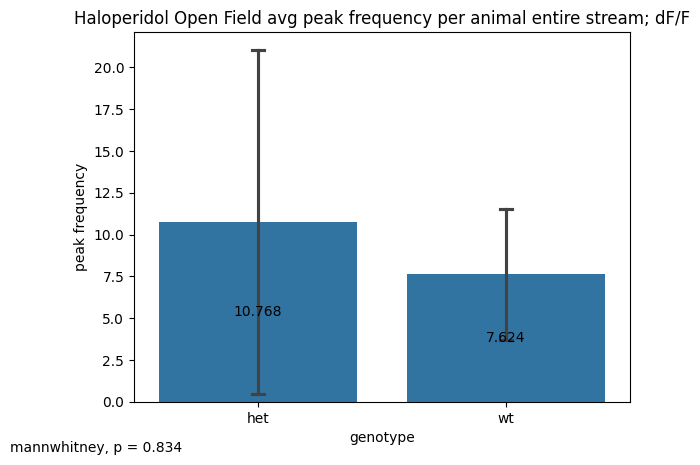

In [122]:
ax = sns.barplot(data = df, x = 'genotype', y = 'peak frequency', errorbar='se', capsize=.05)
ax.bar_label(ax.containers[0], label_type='center')
ax.set_title('Haloperidol Open Field avg peak frequency per animal entire stream; dF/F')
ax.text(-1, -3, 
         f"mannwhitney, p = {np.round(mannwhitneyu(het_summary['peak frequency'], wt_summary['peak frequency'])[1], decimals=3)}")

In [123]:
hdf['auc mean'].to_clipboard(index=False, header=False)

In [124]:
wdf['auc mean'].to_clipboard(index=False, header=False)

In [126]:
hdf['peak frequency'].to_clipboard(index=False, header=False)

In [120]:
# data, dFF, dsFactor, time = FPUtils.readFile(testpath)
# peaks = find_peaks(dFF, prominence=8)
# peak_dff = []
# for i in peaks[0]:
#     peak_dff.append(dFF[i])

# fig3 = plt.figure(figsize=(20,12))
# ax2 = fig3.add_subplot(311)
# ax2.scatter(x= peaks[0]/(101.8)+5, y = peak_dff, s = 10, color = 'red' )
# p1, = ax2.plot(time, dFF, linewidth=2, color='green', label='dff')
# ax2.legend(handles=[p1], loc='upper right')

In [121]:
hetgraphs = []
for file in glob.glob(hetTanks):
    dfgraphs = []
    data,dFF,dsF, time = FPUtils.readFile(file)
    peaks = find_peaks(dFF, prominence=8)
    for i in peaks[0]:
        t = 2*101.8
        if (i-t > 0) and (i+t < len(dFF)):
            dfgraphs.append(dFF[int(i-t): int(i+t)])
    hetgraphs.append(np.mean(dfgraphs, axis=0))

read from t=0s to t=1798.94s
read from t=0s to t=1799.06s


KeyboardInterrupt: 

In [103]:
wtgraphs = []
for file in glob.glob(wtTanks):
    dfgraphs = []
    data,dFF,dsF, time = FPUtils.readFile(file)
    peaks = find_peaks(dFF, prominence=8)
    for i in peaks[0]:
        t = 2*101.8
        if (i-t > 0) and (i+t < len(dFF)):
            dfgraphs.append(dFF[int(i-t): int(i+t)])
    wtgraphs.append(np.mean(dfgraphs, axis=0))

read from t=0s to t=1799.1s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


read from t=0s to t=1799.1s
read from t=0s to t=1799.1s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


read from t=0s to t=1799.11s
read from t=0s to t=1799.09s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


read from t=0s to t=1799.09s


c:\Users\User\Tischfield_Lab\Fiber_Photo\FP analysis codes\FPUtils.py:47: RankWarning: Polyfit may be poorly conditioned
  bls = np.polyfit(x, y, 1)


In [104]:
len(time)

182493

In [105]:
time = np.arange(-2,2, 4/len(hetgraphs[0]))
plt.plot(time, np.mean(hetgraphs, axis=0), color = 'blue', label = 'het')
plt.plot(time, np.mean(wtgraphs, axis=0), color = 'red', label = 'wty')
plt.fill_between(time, np.mean(hetgraphs, axis=0)+np.std(hetgraphs, axis=0)
                      ,np.mean(hetgraphs, axis=0)-np.std(hetgraphs, axis=0), facecolor='blue', alpha=0.2)
plt.fill_between(time, np.mean(wtgraphs, axis=0)+np.std(wtgraphs, axis=0)
                      ,np.mean(wtgraphs, axis=0)-np.std(wtgraphs, axis=0), facecolor='red', alpha=0.2)
plt.ylabel(r'$\Delta$F/F')
plt.xlabel('seconds')
plt.title(r'Open Field, average peak waveform, prominence 8 ($\Delta$F/F)')
plt.legend()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.